# Another PCA example: fingerprints

We get the data from [here](https://repository.lboro.ac.uk/articles/dataset/Height_weight_and_fingerprint_measurements_collected_from_200_participants/7539206). This time, we first download the data, then open the file. The file is an excel table, so we need to use a library for doing that. (You may need to install that library using `install.packages("openxlsx")`.)

In [1]:
download.file(url = "https://repository.lboro.ac.uk/ndownloader/files/14015774",
             destfile = "fingerprint_data.xlsx")
data = openxlsx::read.xlsx("fingerprint_data.xlsx")
head(data)

,Participant.Number,Gender,Age,Dominant.Hand,Height.(cm).(average.of.3.measurments),Weight.(kg).(average.of.3.measurements),Fingertip.Temperature.(°C),Fingerprint.Height.(mm),Fingerprint.Width.(mm),Fingerprint.Area.(mm2),Fingerprint.Circumference.(mm)
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,Male,NA,Right,174.0000,70.00000,34,19.8,13.7,240.6,57.7
2,102,Male,NA,Right,202.0000,99.00000,30,24.0,14.1,278.8,62.7
3,103,Male,NA,Right,182.3333,82.00000,29,20.0,13.7,223.8,55.5
4,104,Male,NA,Right,184.0000,75.00000,29,23.2,14.0,281.8,63.3
5,105,Male,18,Right,180.6667,80.33333,29,22.7,15.0,286.7,62.7
6,106,Male,20,Right,180.0000,59.00000,32,24.3,14.0,299.0,65.6


Let us rework the names of columns a bit, for convenience. Let us also get rid of a few columns we are not really useful.

In [2]:
data = data[,2:dim(data)[2]]
colnames(data) = c("gender", "age", "handedness", "height", "weight",
                  "fing_temp", "fing_height", "fing_width",
                  "fing_area", "fing_circ")

Plotting all these variables is complicated, so we forgo this for the time being.

Let us centre the data. To make things easy, we list the columns to centre and loop on this. Note that there are some `NA` values, so we remove them using the function `complete.cases`, which identifies rows where at least one of the variables is `NA`. (We could also beware and just use `na.rm = TRUE` when taking the average to remove these values.) We make new columns with the prefix `.c`, just to still have the initial data handy if need be.

In [3]:
data = data[complete.cases(data),]
to_centre = c("age", "height", 
              "weight", "fing_temp", 
              "fing_height", "fing_width",
              "fing_area", "fing_circ")
for (c in to_centre) {
    new_c = sprintf("%s.c", c)
    data[[new_c]] = data[[c]] - mean(data[[c]], na.rm = TRUE)
}
head(data)

,gender,age,handedness,height,weight,fing_temp,fing_height,fing_width,fing_area,fing_circ,age.c,height.c,weight.c,fing_temp.c,fing_height.c,fing_width.c,fing_area.c,fing_circ.c
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,Male,18,Right,180.6667,80.33333,29,22.7,15.0,286.7,62.7,-3.256098,7.711382,7.38008130,0.2865854,2.3445122,1.4518293,52.50732,6.088415
6,Male,20,Right,180.0000,59.00000,32,24.3,14.0,299.0,65.6,-1.256098,7.044715,-13.95325203,3.2865854,3.9445122,0.4518293,64.80732,8.988415
12,Male,18,Right,180.6667,68.00000,27,21.1,15.6,286.1,62.4,-3.256098,7.711382,-4.95325203,-1.7134146,0.7445122,2.0518293,51.90732,5.788415
23,Male,18,Right,188.6667,73.00000,29,23.0,14.0,264.0,61.0,-3.256098,15.711382,0.04674797,0.2865854,2.6445122,0.4518293,29.80732,4.388415
24,Female,19,Right,166.0000,65.00000,27,18.4,11.1,171.4,49.3,-2.256098,-6.955285,-7.95325203,-1.7134146,-1.9554878,-2.4481707,-62.79268,-7.311585
25,Female,18,Right,163.0000,73.00000,31,18.3,11.9,192.8,52.1,-3.256098,-9.955285,0.04674797,2.2865854,-2.0554878,-1.6481707,-41.39268,-4.511585


Let us compute the sample covariance matrix.

In [4]:
# Select X as the matrix we want to process
X = as.matrix(data[, to_centre])
S = 1/(dim(X)[1]-1)*t(X) %*% X
S

,age,height,weight,fing_temp,fing_height,fing_width,fing_area,fing_circ
age,478.9939,3692.562,1579.172,614.2393,435.6270,290.1264,5013.139,1210.8221
height,3692.5624,30183.706,12766.541,4994.7669,3553.3620,2364.9380,41006.579,9882.9540
weight,1579.1718,12766.541,5598.505,2118.0613,1505.3519,1006.2624,17504.745,4190.9405
fing_temp,614.2393,4994.767,2118.061,840.9141,588.5436,392.2006,6781.800,1636.9264
fing_height,435.6270,3553.362,1505.352,588.5436,420.9758,279.4357,4875.698,1169.4310
fing_width,290.1264,2364.938,1006.262,392.2006,279.4357,186.8359,3249.257,778.0915
fing_area,5013.1387,41006.579,17504.745,6781.8000,4875.6983,3249.2573,57053.656,13563.3565
fing_circ,1210.8221,9882.954,4190.940,1636.9264,1169.4310,778.0915,13563.357,3252.2678


In [5]:
ev = eigen(S)
ev$values

[1] 9.730867e+04 4.982986e+02 1.669174e+02 2.565635e+01 1.349931e+01
[6] 2.008242e+00 6.457803e-01 1.559819e-01

The result of a call to `eigen` will not necessarily be well ordered. (Here, they are.) So we order the eigenvalues in decreasing order and apply the same ordering to the eigenvectors. (As the eigenvectors are the columns of `ev$vectors`, we order the columns.

In [6]:
idx_order = order(ev$values, decreasing = TRUE)
ev$values = ev$values[idx_order]
ev$vectors = ev$vectors[, idx_order]

Let us add the singular values to `ev`.

In [39]:
ev$sing_values = sqrt(ev$values)

Now do things "properly".

In [7]:
#install.packages("pracma")
GS = pracma::gramSchmidt(A = ev$vectors)
GS$Q
# Just to check that Q is indeed with normalised columns
colSums(GS$Q[,1:dim(GS$Q)[2]]^2)
GS$Q[,1] %*% GS$Q[,2]

-0.06785926,-0.10703810,-0.074771554,0.959199870,-0.21608682,0.10065233,-0.030350587,-0.023178128
-0.55435636,-0.72869902,0.290626700,-0.152379696,-0.15804372,0.15956105,-0.058350355,-0.012688619
-0.23625691,-0.18581742,-0.946363825,-0.106759855,-0.00455192,-0.05122393,0.002219217,0.001694049
-0.09173610,-0.13238200,0.016673068,0.178396675,0.95749120,0.13389150,-0.077869385,-0.034295121
-0.06566056,-0.02693052,0.041586794,0.053196632,0.02950635,-0.48055924,-0.517957328,0.700226031
-0.04374434,-0.01430565,0.004070984,0.027623399,0.04800455,0.17002750,0.735576268,0.651779046
-0.76437249,0.63185800,0.060301062,0.007078515,-0.00675132,0.10275359,-0.044815268,-0.013840031
-0.18265026,-0.07289060,0.093169759,0.099246954,0.09109287,-0.82064226,0.422190555,-0.287747776


[1] 1 1 1 1 1 1 1 1

-5.551115e-17


So `Q` is indeed an orthogonal matrix.

Now recall we saw a theorem that told us how to construct a new basis..

In [8]:
# Make an identity matrix
Id = diag(dim(GS$Q)[1])
# Make the augmented matrix
A = cbind(GS$Q, Id)
# Compute the RREF and extract the relevant matrix
P = pracma::rref(A)[,(dim(GS$Q)[2]+1):dim(A)[2]]
X.new = X %*% t(P)

Now we use the built in function.

In [9]:
data.pca = prcomp(data[, to_centre], 
                  center = TRUE, scale = TRUE)
summary(data.pca)

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6     PC7
Standard deviation     2.0974 1.0942 0.9954 0.86216 0.6165 0.50797 0.15814
Proportion of Variance 0.5499 0.1497 0.1239 0.09292 0.0475 0.03225 0.00313
Cumulative Proportion  0.5499 0.6996 0.8234 0.91632 0.9638 0.99608 0.99921
                           PC8
Standard deviation     0.07959
Proportion of Variance 0.00079
Cumulative Proportion  1.00000

The "proportion of variance" information is actually the proportion (and then cumulative proportion) represented by the singular value associated to each principal component. We check this (approximately) by comparing with the singular values we computed.

In [11]:
ev$sing_values/(sum(ev$sing_values))
cumsum(ev$sing_values)/(sum(ev$sing_values))

numeric(0)

numeric(0)

In [12]:
str(data.pca)

List of 5
 $ sdev    : num [1:8] 2.097 1.094 0.995 0.862 0.616 ...
 $ rotation: num [1:8, 1:8] 0.0202 0.354 0.2875 0.0657 0.4268 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:8] "age" "height" "weight" "fing_temp" ...
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:8] 21.3 173 73 28.7 20.4 ...
  ..- attr(*, "names")= chr [1:8] "age" "height" "weight" "fing_temp" ...
 $ scale   : Named num [1:8] 4.94 9.31 15.61 3.38 2.02 ...
  ..- attr(*, "names")= chr [1:8] "age" "height" "weight" "fing_temp" ...
 $ x       : num [1:164, 1:8] 2.43 2.51 1.96 1.98 -2.88 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:164] "5" "6" "12" "23" ...
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [13]:
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid



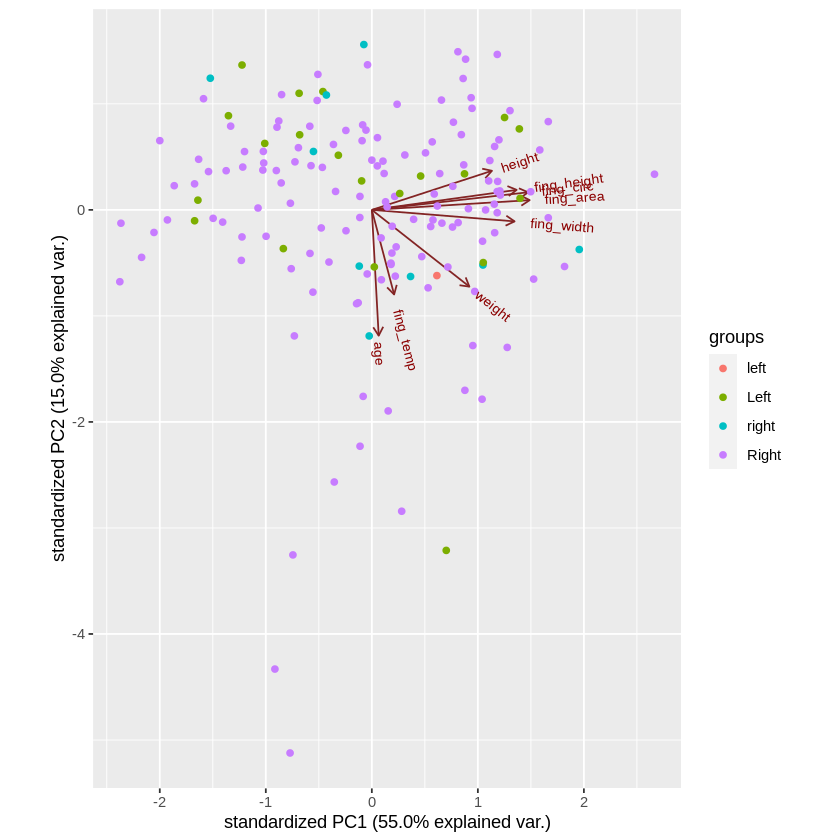

In [14]:
library(ggbiplot)
ggbiplot(data.pca, groups = data$handedness)

Not that it makes much difference, but here we realise that handedness is badly encoded, in the sense that there are some individuals with lowercase handedness and others where the word starts with a capital letter. Let us fix this and plot again.

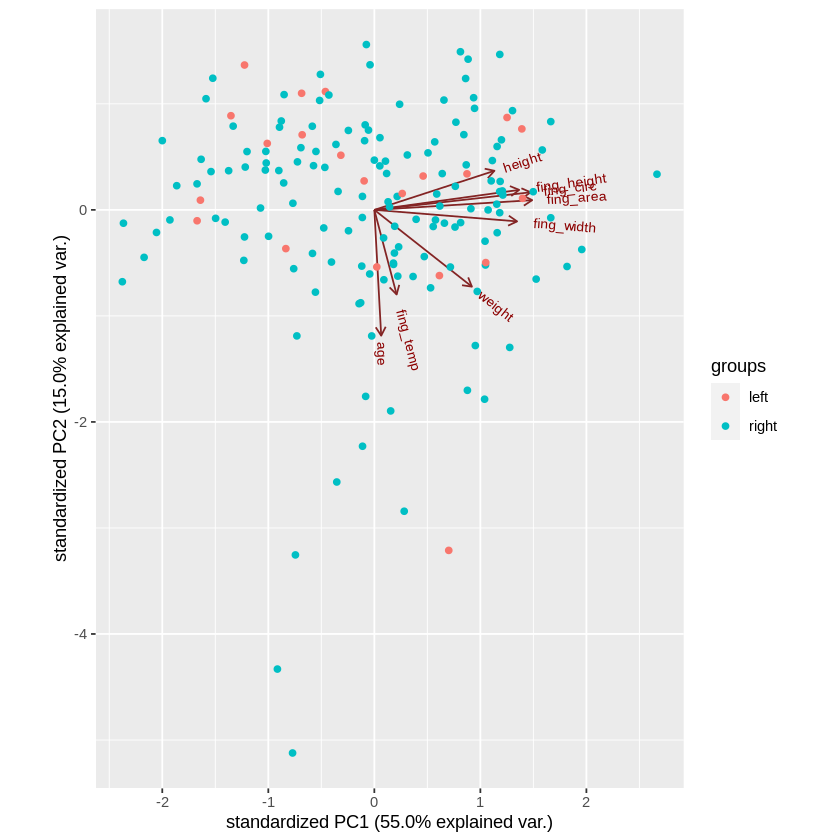

In [15]:
data$handedness = tolower(data$handedness)
ggbiplot(data.pca, groups = data$handedness)

Something else you can plot: ellipses containing most elements in a group, for the groups we have selected (here, handedness).

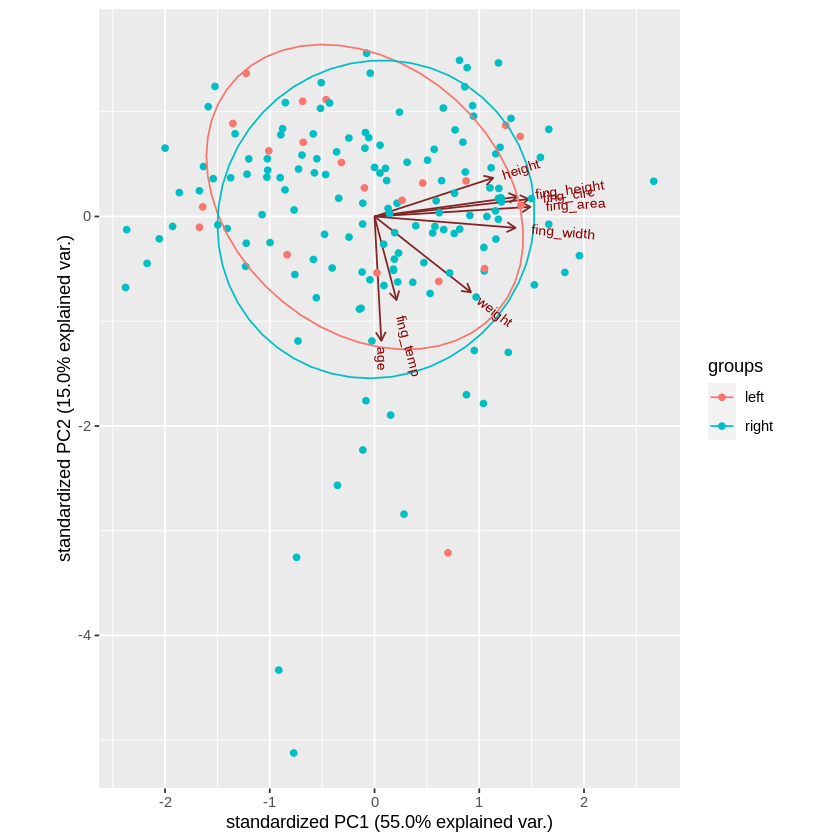

In [16]:
ggbiplot(data.pca, groups = data$handedness, ellipse = TRUE)